In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [2]:
df = pd.read_csv('DataEngineer.csv')

df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


In [6]:
df['count'] = 1

df['company'] = df['Company Name'].apply(lambda x: x.split("\n")[0])
df['company'].replace('Management Decisions, Inc.', 'M Decisions', inplace=True)
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,count,company,job_title
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,1,Sagence,DE
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,1,Enterprise Integration,Sr. DE
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,1,Maestro Technologies,DEs
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,1,Jane Street,Client Trade Support Engineer
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,1,GNY Insurance Companies,DE


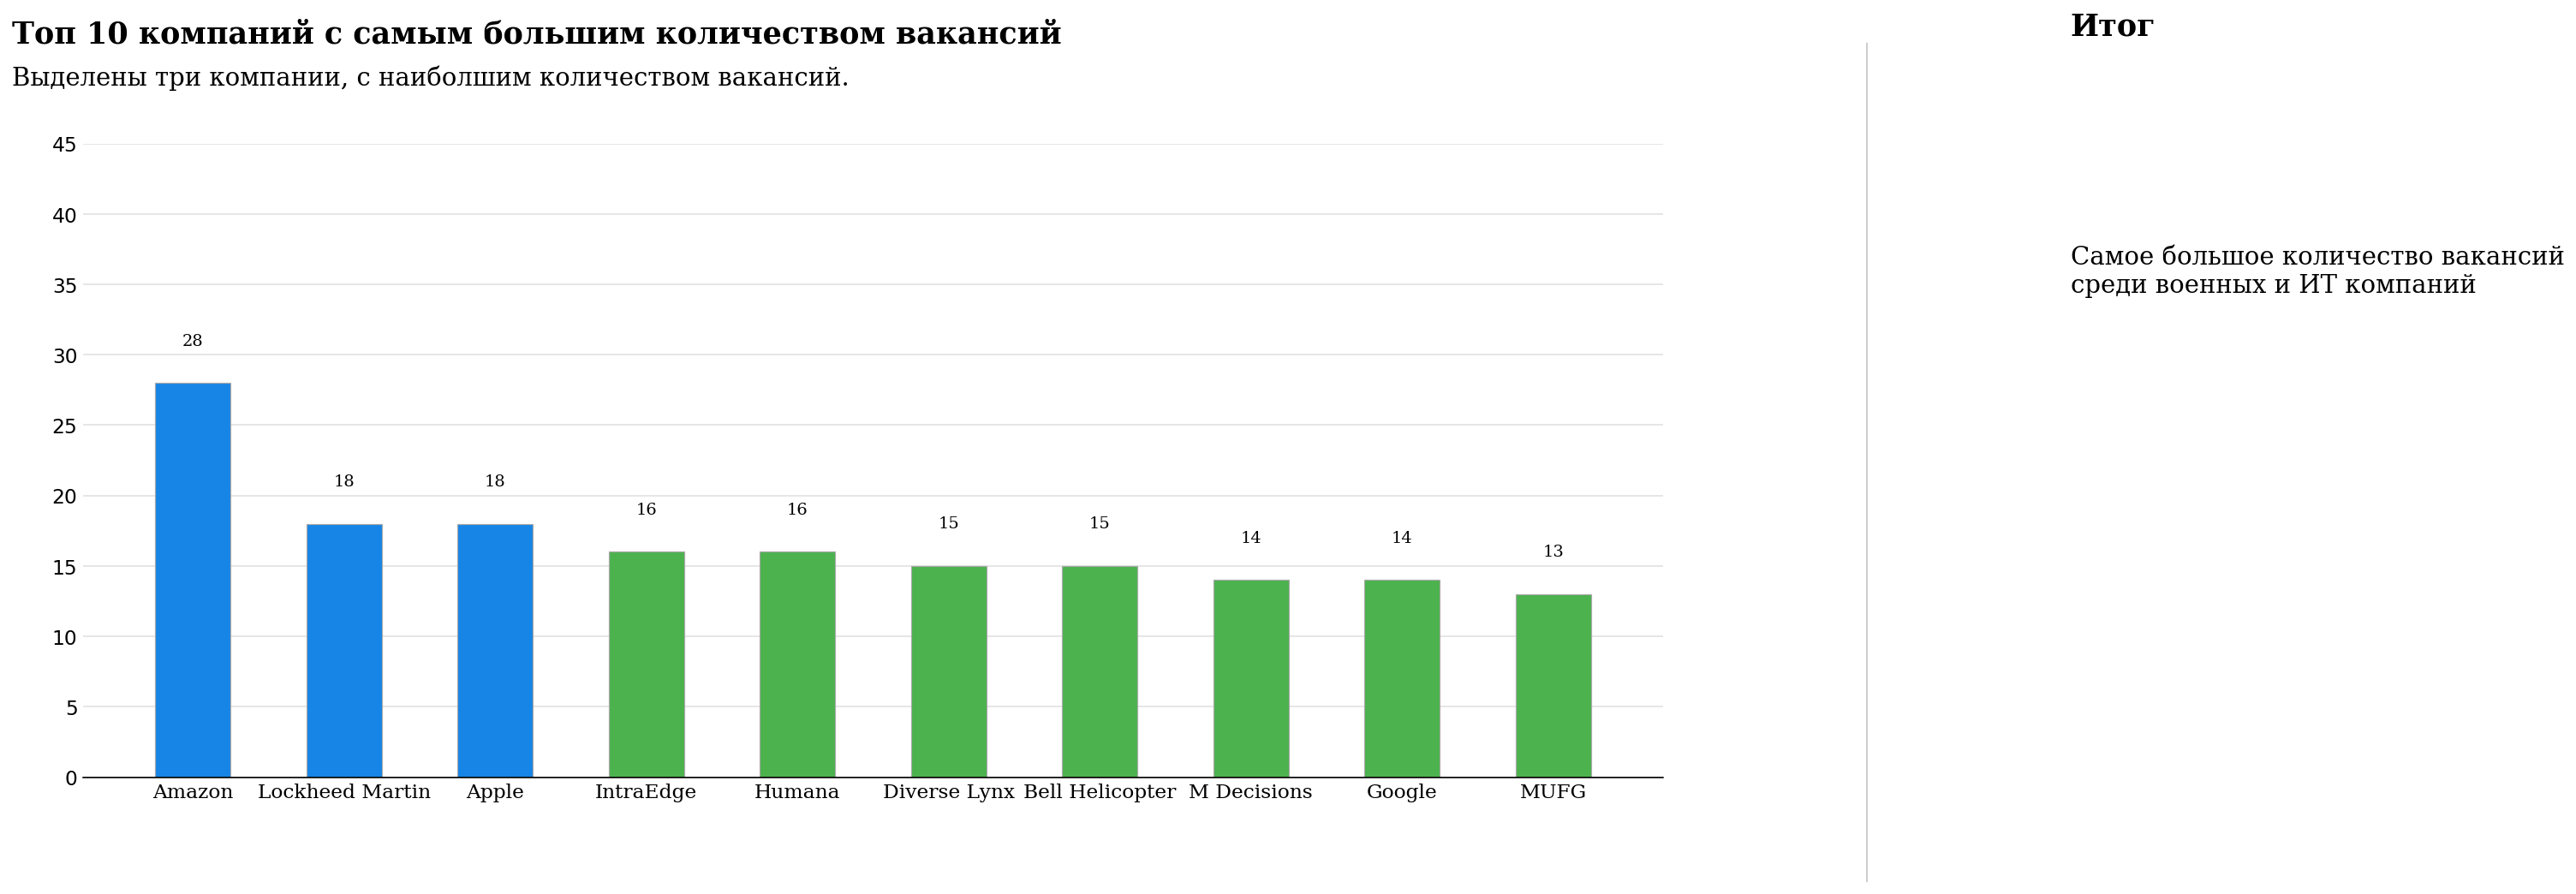

In [4]:
data = df.groupby('company')['count'].sum().sort_values(ascending=False)[:10]
color_map = ['#4bb24e' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#1785e5'

fig, ax = plt.subplots(1,1, figsize=(17, 7))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

fig.text(0.09, 1, 'Топ 10 компаний с самым большим количеством вакансий', fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три компании, с наиболшим количеством вакансий.', fontsize=15, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=18, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
Самое большое количество вакансий
среди военных и ИТ компаний
'''
         , fontsize=15, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 50, 5)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


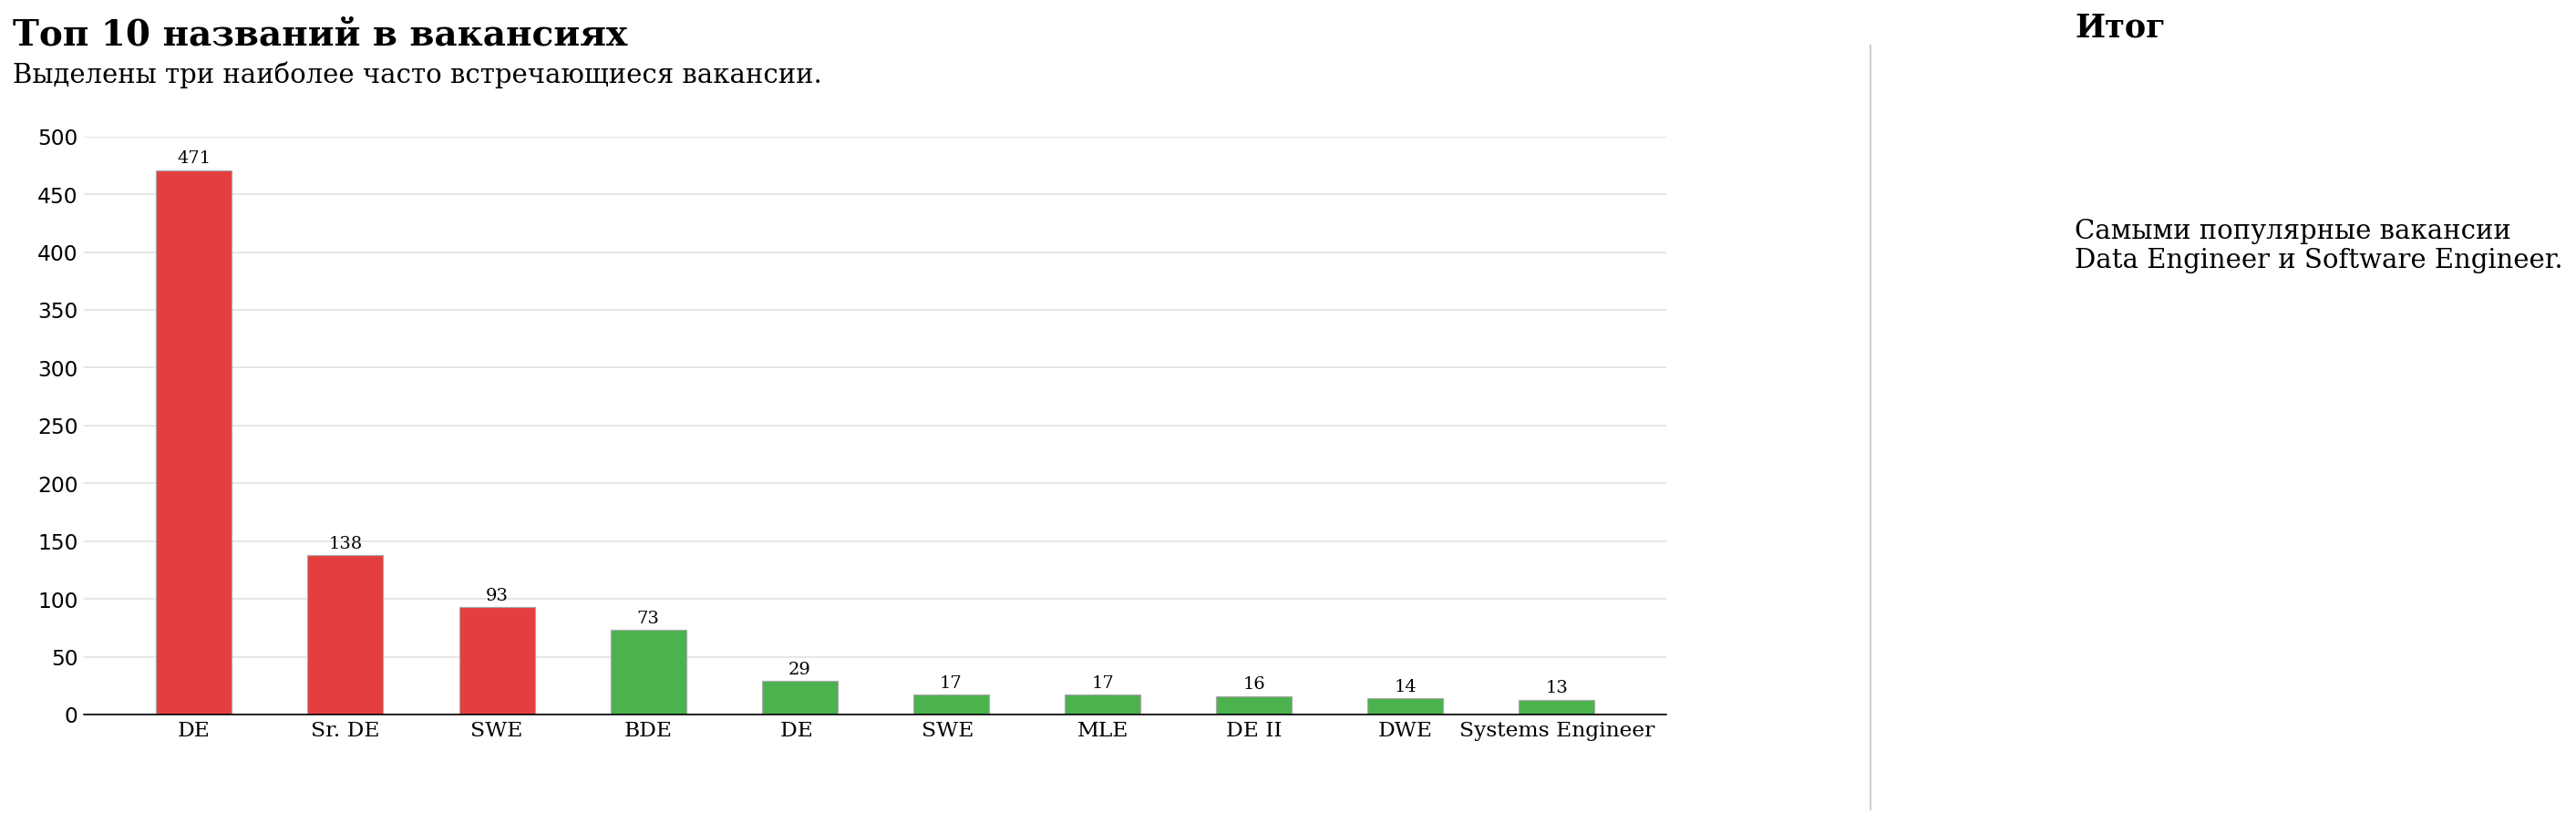

In [5]:
df['job_title'] = df['Job Title'].apply(lambda x: x.split("(")[0])

df['job_title'].replace('Big Data Engineer', 'BDE', inplace=True)
df['job_title'].replace('Senior Data Engineer', 'Sr. DE', inplace=True, regex=True)
df['job_title'].replace('Data Engineer', 'DE', inplace=True, regex=True)
df['job_title'].replace('Software Engineer', 'SWE',inplace=True, regex=True)
df['job_title'].replace('Data Scientist', 'DS',inplace=True, regex=True)
df['job_title'].replace('Machine Learning Engineer', 'MLE', inplace=True)
df['job_title'].replace('Data Warehouse Engineer', 'DWE', inplace=True, regex=True)


data = df.groupby('job_title')['count'].sum().sort_values(ascending=False)[:10]

color_map = ['#4bb24e' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#e53e3e'

fig, ax = plt.subplots(1,1, figsize=(16, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 10),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 названий в вакансиях', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три наиболее часто встречающиеся вакансии.', fontsize=15, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=18, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
Самыми популярные вакансии
Data Engineer и Software Engineer.
'''
         , fontsize=15, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 550, 50)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

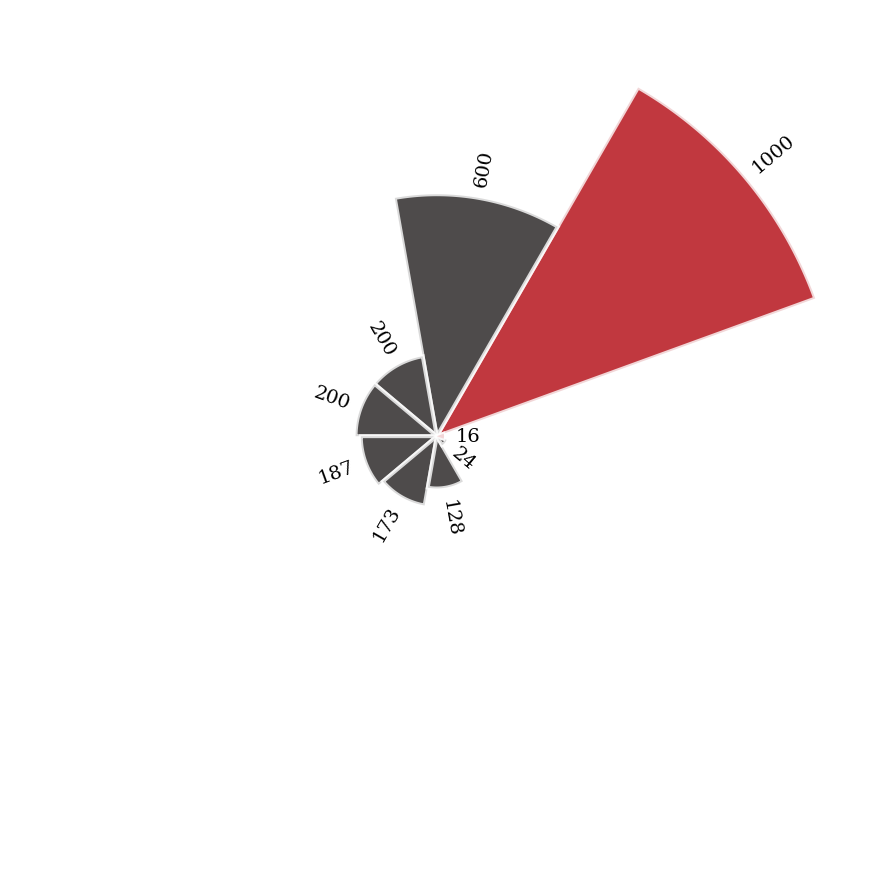

In [23]:
df['job_location'] = df['Location'].apply(lambda x: x.split(", ")[1])
df_location = df.groupby('job_location')['count'].sum().sort_values(ascending=False)

color_map = ['#221f1f' for _ in range(9)]
color_map[0] = color_map[8] =  '#b20710' # color highlight


plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 1000
lowerLimit = 1
labelPadding = 30

max = df_location.max()

slope = (max - lowerLimit) / max
heights = slope * df_location + lowerLimit

width = 2*np.pi / len(df_location.index)

indexes = list(range(1, len(df_location.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

for bar, angle, height, label in zip(bars,angles, heights, df_location):

    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

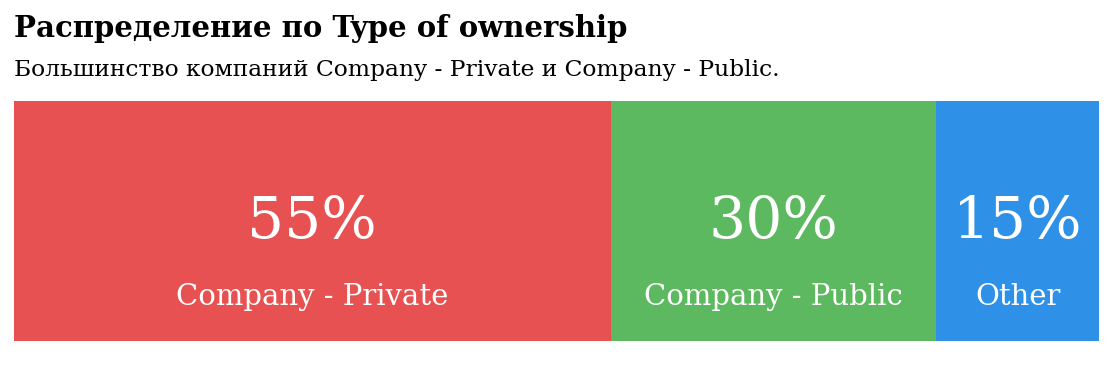

In [61]:
df['type'] = df['Type of ownership']

df['type'].replace('College / University', 'Other', inplace=True)
df['type'].replace('Government', 'Other', inplace=True)
df['type'].replace('Nonprofit Organization', 'Other', inplace=True)
df['type'].replace('Subsidiary or Business Segment', 'Other',inplace=True)
df['type'].replace('Unknown', 'Other',inplace=True, regex=True)
df['type'].replace('Contract', 'Other',inplace=True, regex=True)
df['type'].replace('-1', 'Other',inplace=True, regex=True)
df['type'].replace('Hospital', 'Other',inplace=True, regex=True)

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(10, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Company - Private'], 
        color='#e53e3e', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['Company - Public'], left=mf_ratio['Company - Private'], 
        color='#4bb24e', alpha=0.9, label='Female')
ax.barh(mf_ratio.index, mf_ratio['Other'], left=mf_ratio['Company - Private']+mf_ratio['Company - Public'], 
        color='#1785e5', alpha=0.9, label='Male')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Company - Private'][i]*100)}%", 
                   xy=(mf_ratio['Company - Private'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Company - Private", 
                   xy=(mf_ratio['Company - Private'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Company - Public'][i]*100)}%", 
                   xy=(mf_ratio['Company - Private'][i]+mf_ratio['Company - Public'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate('Company - Public', 
                   xy=(mf_ratio['Company - Private'][i]+mf_ratio['Company - Public'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Other'][i]*100)}%", 
                   xy=(mf_ratio['Company - Private'][i]+mf_ratio['Company - Public'][i]+mf_ratio['Other'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate('Other', 
                   xy=(mf_ratio['Company - Private'][i]+mf_ratio['Company - Public'][i]+mf_ratio['Other'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.03,'Распределение по Type of ownership', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'Большинство компаний Company - Private и Company - Public.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)
plt.show()

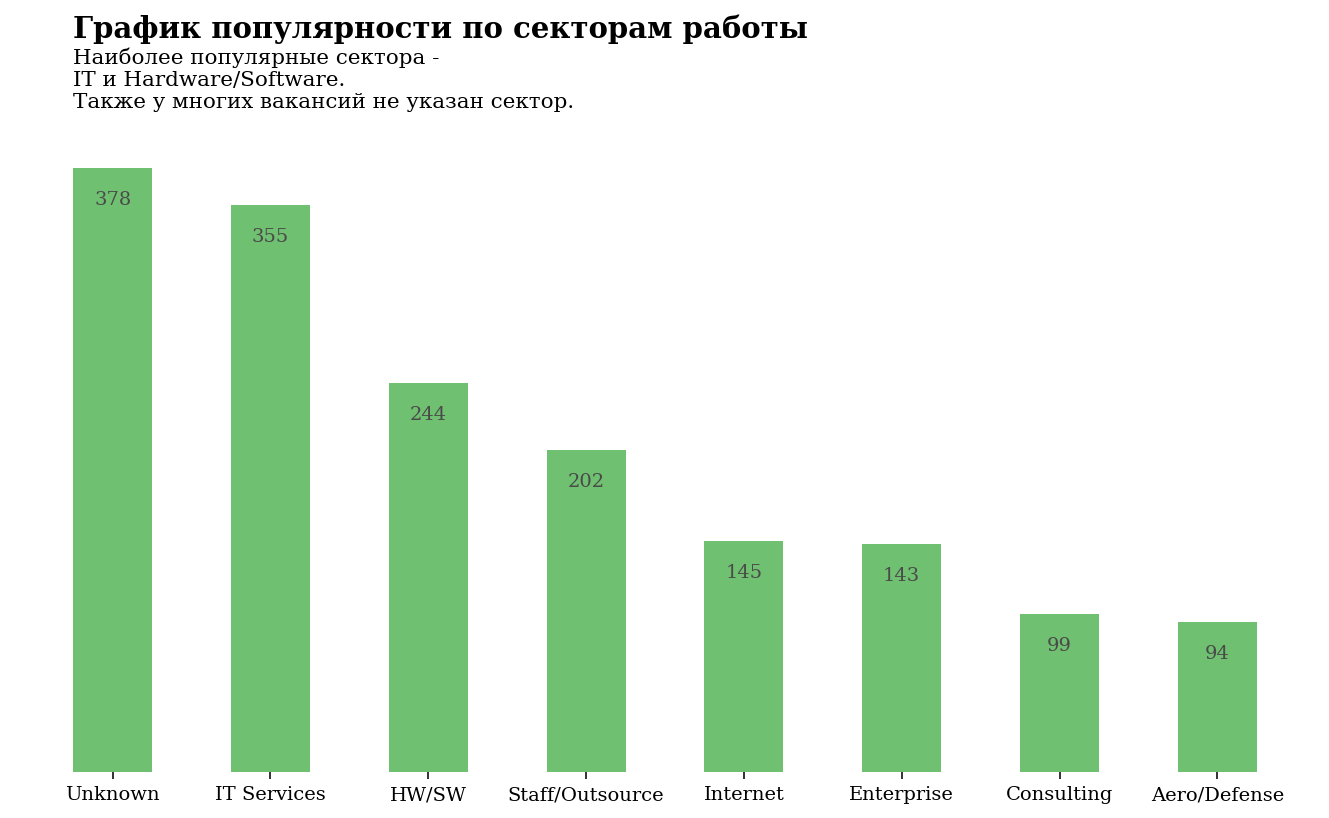

In [108]:
df_industry=df.groupby(['Industry'])['Industry'].count().sort_values(ascending=False)[:8]
df['Industry'].replace('-1', 'Unknown', inplace=True, regex=True)
df['Industry'].replace('Computer Hardware & Software', 'HW/SW', inplace=True)
df['Industry'].replace('Staffing & Outsourcing', 'Staff/Outsource', inplace=True)
df['Industry'].replace('Enterprise Software & Network Solutions', 'Enterprise', inplace=True)
df['Industry'].replace('Aerospace & Defense', 'Aero/Defense', inplace=True)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(df_industry.index, df_industry, width=0.5, color='#4bb24e', alpha=0.8, label="Industry")

# Annotations
for i in df_industry.index:
    ax.annotate(f"{df_industry[i]}", 
                   xy=(i, df_industry[i] - 20),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(df_industry.index, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'График популярности по секторам работы', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''Наиболее популярные сектора -
IT и Hardware/Software.
Также у многих вакансий не указан сектор.
'''

, fontsize=11, fontweight='light', fontfamily='serif')

plt.show()

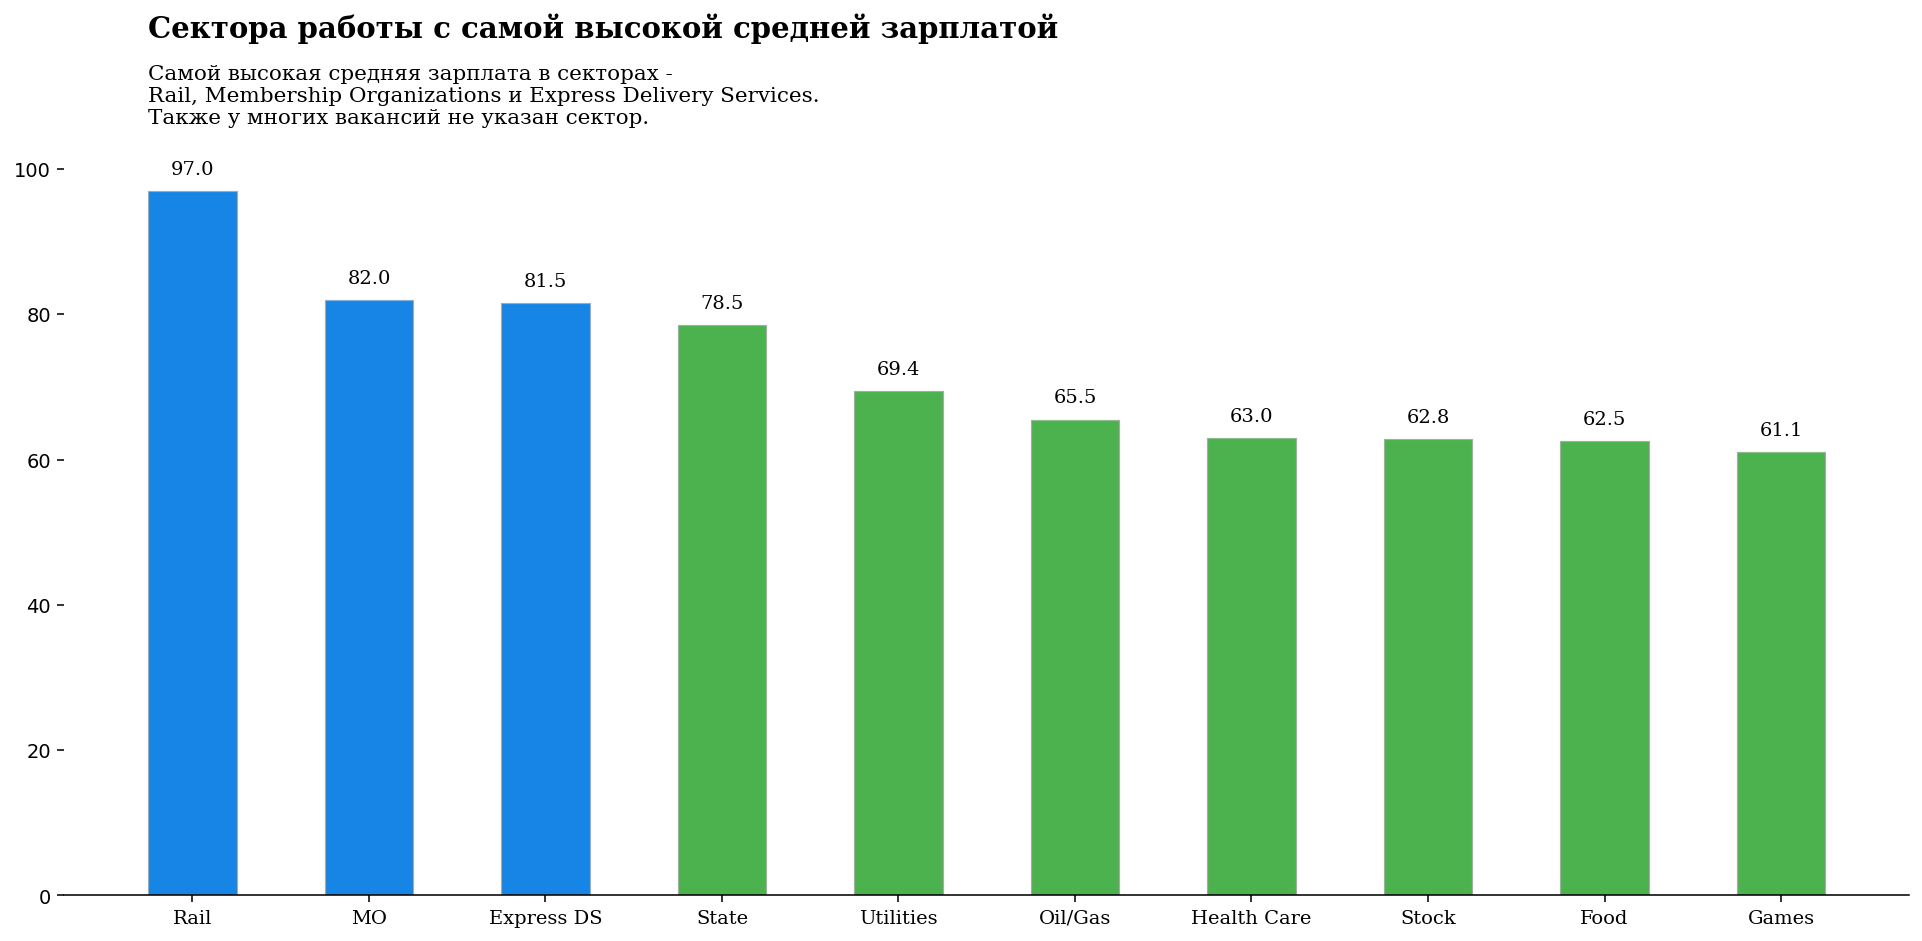

In [162]:
df['salary'] = df['Salary Estimate'].apply(lambda x: x.split(" (")[0])
df['salary'] = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
df['salary'].replace('[$K ]', '', inplace=True, regex=True)
df['salary'] = df['salary'].apply(lambda x: int(x.split("-")[1]) - int(x.split("-")[0]))  

df['Industry'].replace('Membership Organizations', 'MO', inplace=True, regex=True)
df['Industry'].replace('Express Delivery Services', 'Express DS', inplace=True)
df['Industry'].replace('State & Regional Agencies', 'State', inplace=True)
df['Industry'].replace('Oil & Gas Exploration & Production', 'Oil/Gas', inplace=True)
df['Industry'].replace('Health Care Products Manufacturing', 'Health Care', inplace=True)
df['Industry'].replace('Food & Beverage Stores', 'Food', inplace=True)
df['Industry'].replace('Stock Exchanges', 'Stock', inplace=True)
df['Industry'].replace('Video Games', 'Games', inplace=True)

df_salary=df.groupby(['Industry'])['salary'].mean().sort_values(ascending=False)[:10]

color_map = ['#4bb24e' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#1785e5'

fig, ax = plt.subplots(1,1, figsize=(17, 7))
ax.bar(df_salary.index, df_salary, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in df_salary.index:
    ax.annotate(f"{np.round(df_salary[i], 1)}", 
                   xy=(i, df_salary[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(df_salary.index, fontfamily='serif', rotation=0)

fig.text(0.16, 1, 'Cектора работы с самой высокой средней зарплатой', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''Самой высокая средняя зарплата в секторах -
Rail, Membership Organizations и Express Delivery Services.
Также у многих вакансий не указан сектор.
'''

, fontsize=11, fontweight='light', fontfamily='serif')

plt.show()


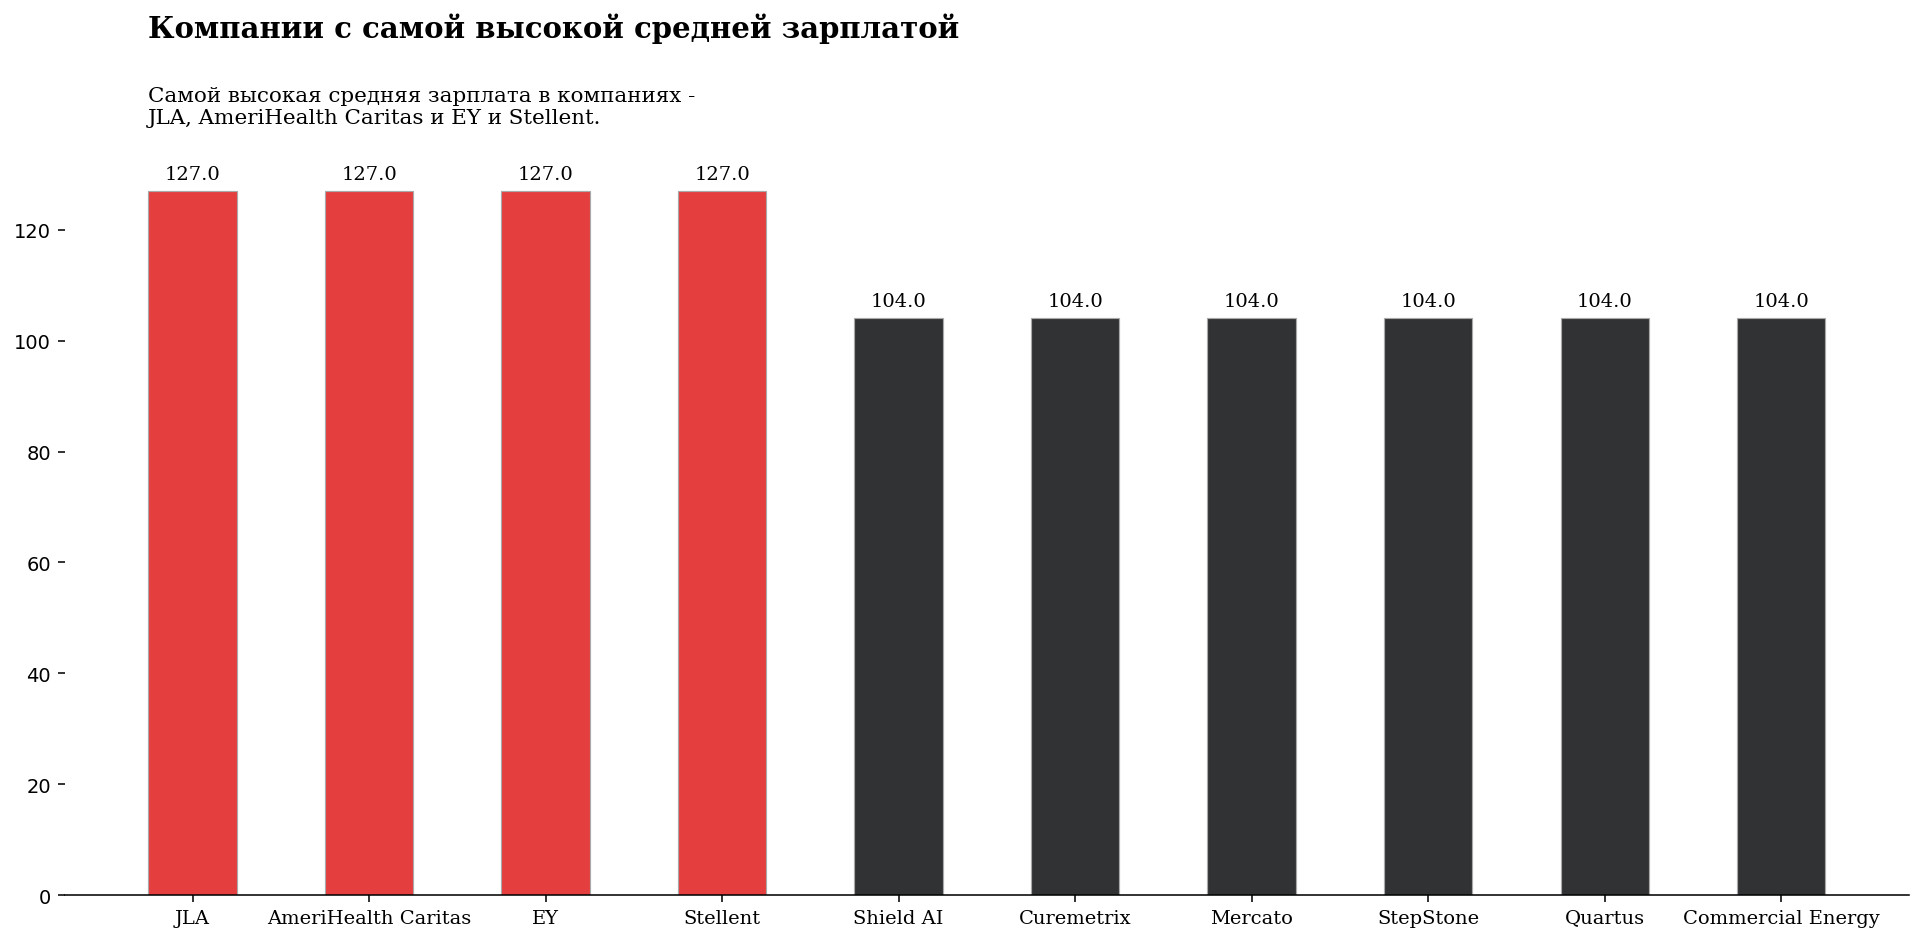

In [165]:
df['company'].replace('Stellent IT LLC', 'Stellent', inplace=True, regex=True)
df['company'].replace('CliniComp, Intl.', 'CliniComp', inplace=True)
df['company'].replace('SmartDrive Systems', 'SmartDrive', inplace=True)
df['company'].replace('Quartus Engineering', 'Quartus', inplace=True)

df_salary_company=df.groupby(['company'])['salary'].mean().sort_values(ascending=False)[:10]

color_map = ['#303233' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = '#e53e3e'

fig, ax = plt.subplots(1,1, figsize=(17, 7))
ax.bar(df_salary_company.index, df_salary_company, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in df_salary_company.index:
    ax.annotate(f"{np.round(df_salary_company[i], 1)}", 
                   xy=(i, df_salary_company[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(df_salary_company.index, fontfamily='serif', rotation=0)

fig.text(0.16, 1, 'Компании с самой высокой средней зарплатой', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''Самой высокая средняя зарплата в компаниях -
JLA, AmeriHealth Caritas и EY и Stellent.
'''

, fontsize=11, fontweight='light', fontfamily='serif')

plt.show()

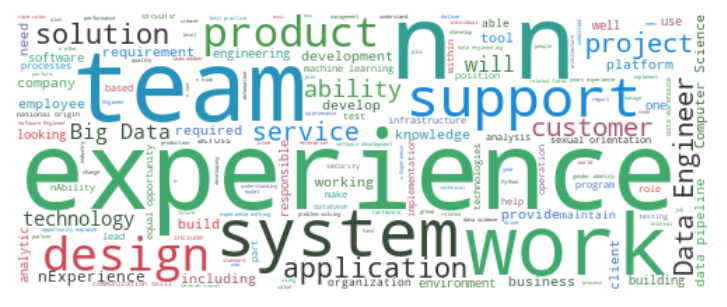

In [ ]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#e53e3e', '#1785e5', '#4bb24e', '#303233'])

text = str(list(df['Job Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()